In [59]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import struct

Load up the original data and the roundtrip result (dctcomp > dctuncomp)

In [60]:
dims = (1200,751)
num_samples = dims[0] * dims[1]

with open('strip.bin','rb') as f:
    orig = np.array(struct.unpack_from('{0}f'.format(num_samples), f.read()))
    orig = orig.reshape(dims).T
    
with open('strip.bin.rt','rb') as f:
    rt_data = np.array(struct.unpack_from('{0}f'.format(num_samples), f.read()));
    rt_data = rt_data.reshape(dims).T

And plot it

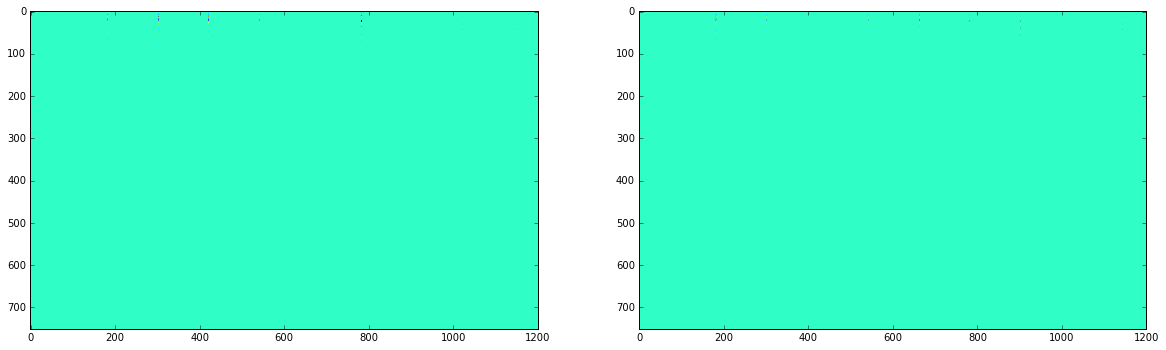

In [61]:
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(orig)
plt.subplot(1,2,2)
plt.imshow(rt_data)

we can't see anything because of some pretty significant outliers, there are hardy visible on the histogram but that is what is keeping the x axis range wide.

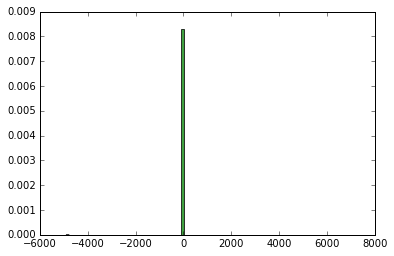

In [62]:
n, bins, patches = plt.hist(orig.flatten(), 100, normed=1, facecolor='green', alpha=0.75)

If we pull in the limits on out plots we start to see wher the data is

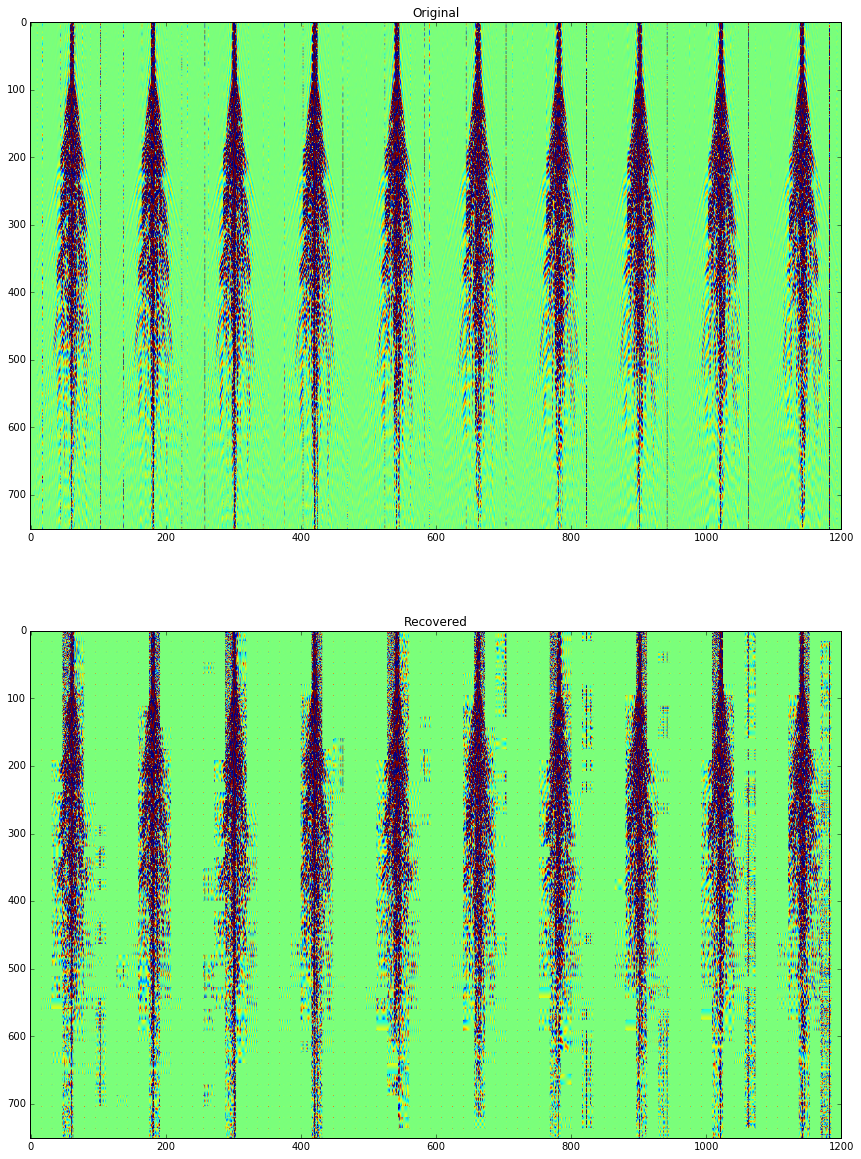

In [63]:
plt.figure(figsize=(20,20))
plt.subplot(2,1,1)
plt.imshow(orig, vmin=-0.5, vmax=0.5)
plt.title('Original')
plt.subplot(2,1,2)
plt.imshow(rt_data, vmin=-0.5, vmax=0.5)
plt.title('Recovered')

We are seeing lots of "block coding" artefacts in the output, I think because of outliers and teh quanitsation going on the DCT. Most of our image informaiton is actually getting represented in a few DCT coefficients, hence we are getting poor quality encoding on those. (or something along those lines)

To verify, we can clip the data save this off to a new file and run that through dctcomp > dctcomp.

In [64]:
clipped = np.clip(orig, -1, 1)
with open('strip.bin.clip','wb') as f:
    f.write(clipped.astype('float32').tobytes())

In [65]:
with open('strip.bin.clip.rt','rb') as f:
    rt_clip_data = np.array(struct.unpack_from('{0}f'.format(num_samples), f.read()));
    rt_clip_data = rt_clip_data.reshape(dims).T

And now we have a decent recovery from the uncompression

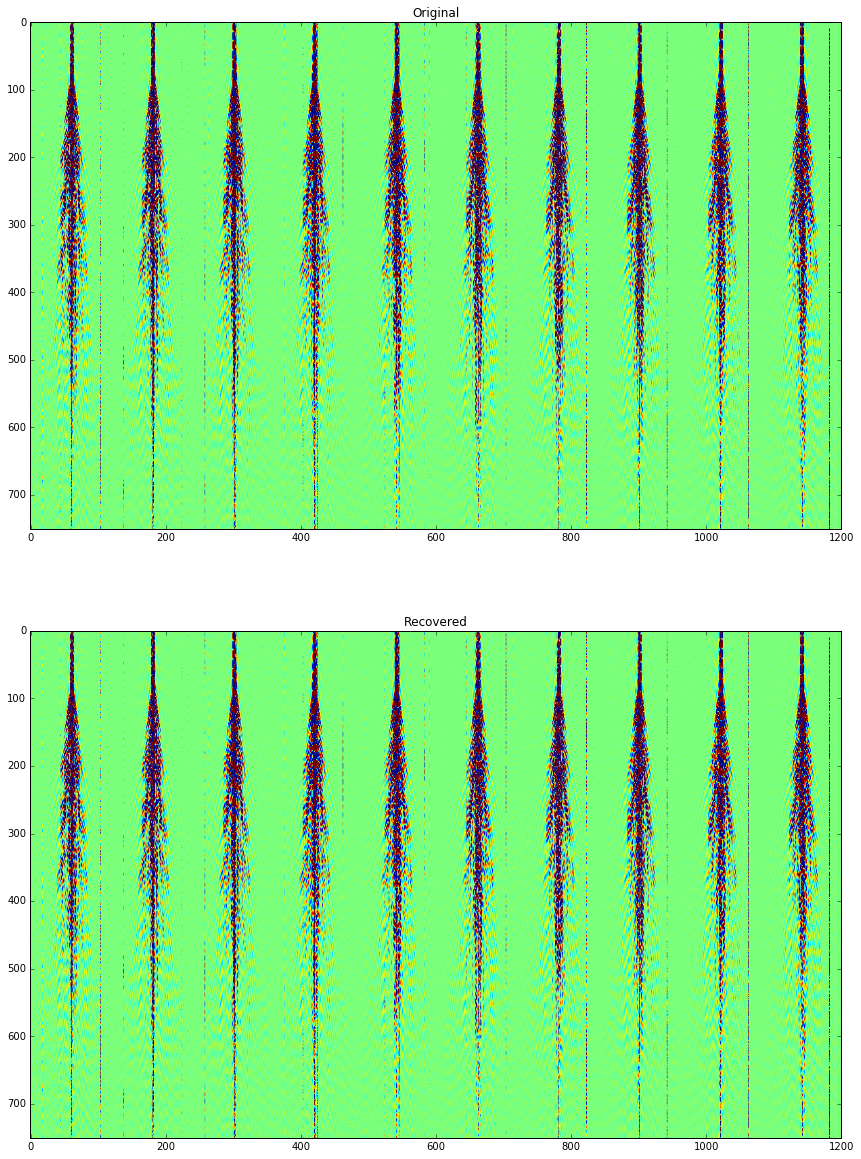

In [67]:
plt.figure(figsize=(20,20))
plt.subplot(2,1,1)
plt.imshow(clipped)
plt.title('Original')
plt.subplot(2,1,2)
plt.imshow(rt_clip_data)
plt.title('Recovered')

So one conclusion here is that to use dct conpression we need to pre-process and remove outliers before compressing the data on the server.